# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset.tail()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0
9999,0,1,0,0,0,0,0,0,0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [6]:
dataset.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Implementing UCB

In [14]:
import math
N = len(dataset)                    # Number of users -> 10000
d = len(dataset.columns)            # Number of possible actions -> 10 ads
ads_selected = []                   # Record of ad selected per each round. Will be of len(dataset)
numbers_of_selections = [0] * d     # Record of number of times each ad was selected. Will be of len(dataset.columns)
sums_of_rewards = [0] * d           # Record of number of times ad was selected. Will be of len(dataset.columns)
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound: # "Value" of an ad will increase everytime it is selected!
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Watch it happen to understand it

In [12]:
import math
N = 200
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
      print('        i = ', i, ' sums_of_rewards[i] = ', sums_of_rewards[i], ', average_reward = ', average_reward, ', numbers_of_selections[i] = ', numbers_of_selections[i], ', delta_i = ', delta_i, ', upper_bound = ', upper_bound)
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
    print('    i = ', i, ', ad = ', ad, ', max_upper_bound = ', max_upper_bound)
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward
  print('n = ', n, ', ad = ', ad, ', ads_selected = ', ads_selected, ', numbers_of_selections = ', numbers_of_selections)
  print('reward = ', reward, ', sums_of_rewards = ', sums_of_rewards, ', total_reward = ', total_reward)

    i =  0 , ad =  0 , max_upper_bound =  inf
    i =  1 , ad =  0 , max_upper_bound =  inf
    i =  2 , ad =  0 , max_upper_bound =  inf
    i =  3 , ad =  0 , max_upper_bound =  inf
    i =  4 , ad =  0 , max_upper_bound =  inf
    i =  5 , ad =  0 , max_upper_bound =  inf
    i =  6 , ad =  0 , max_upper_bound =  inf
    i =  7 , ad =  0 , max_upper_bound =  inf
    i =  8 , ad =  0 , max_upper_bound =  inf
    i =  9 , ad =  0 , max_upper_bound =  inf
n =  0 , ad =  0 , ads_selected =  [0] , numbers_of_selections =  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
reward =  1 , sums_of_rewards =  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] , total_reward =  1
        i =  0  sums_of_rewards[i] =  1 , average_reward =  1.0 , numbers_of_selections[i] =  1 , delta_i =  1.019666990168809 , upper_bound =  2.019666990168809
    i =  0 , ad =  0 , max_upper_bound =  2.019666990168809
    i =  1 , ad =  1 , max_upper_bound =  inf
    i =  2 , ad =  1 , max_upper_bound =  inf
    i =  3 , ad =  1 , max_upper_bound =  inf

        i =  9  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  1 , delta_i =  1.8965344471423544 , upper_bound =  1.8965344471423544
    i =  9 , ad =  0 , max_upper_bound =  2.896534447142354
n =  10 , ad =  0 , ads_selected =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0] , numbers_of_selections =  [2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
reward =  0 , sums_of_rewards =  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] , total_reward =  1
        i =  0  sums_of_rewards[i] =  1 , average_reward =  0.5 , numbers_of_selections[i] =  2 , delta_i =  1.3651666518564685 , upper_bound =  1.8651666518564685
    i =  0 , ad =  0 , max_upper_bound =  1.8651666518564685
        i =  1  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  1 , delta_i =  1.9306371939548872 , upper_bound =  1.9306371939548872
    i =  1 , ad =  1 , max_upper_bound =  1.9306371939548872
        i =  2  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  1 , delta_i =  1.930

        i =  2  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  2 , delta_i =  1.4723378750891805 , upper_bound =  1.4723378750891805
    i =  2 , ad =  0 , max_upper_bound =  1.9723378750891805
        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  2 , delta_i =  1.4723378750891805 , upper_bound =  1.4723378750891805
    i =  3 , ad =  0 , max_upper_bound =  1.9723378750891805
        i =  4  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  2 , delta_i =  1.4723378750891805 , upper_bound =  1.4723378750891805
    i =  4 , ad =  0 , max_upper_bound =  1.9723378750891805
        i =  5  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  2 , delta_i =  1.4723378750891805 , upper_bound =  1.4723378750891805
    i =  5 , ad =  0 , max_upper_bound =  1.9723378750891805
        i =  6  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  2 , de

        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  2 , delta_i =  1.5537557300461198 , upper_bound =  1.5537557300461198
    i =  3 , ad =  3 , max_upper_bound =  1.5537557300461198
        i =  4  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  2 , delta_i =  1.5537557300461198 , upper_bound =  1.5537557300461198
    i =  4 , ad =  3 , max_upper_bound =  1.5537557300461198
        i =  5  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  2 , delta_i =  1.5537557300461198 , upper_bound =  1.5537557300461198
    i =  5 , ad =  3 , max_upper_bound =  1.5537557300461198
        i =  6  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  2 , delta_i =  1.5537557300461198 , upper_bound =  1.5537557300461198
    i =  6 , ad =  3 , max_upper_bound =  1.5537557300461198
        i =  7  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  2 , de

        i =  5  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  3 , delta_i =  1.3163844238670797 , upper_bound =  1.3163844238670797
    i =  5 , ad =  0 , max_upper_bound =  1.3900223522150332
        i =  6  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  3 , delta_i =  1.3163844238670797 , upper_bound =  1.3163844238670797
    i =  6 , ad =  0 , max_upper_bound =  1.3900223522150332
        i =  7  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  3 , delta_i =  1.3163844238670797 , upper_bound =  1.3163844238670797
    i =  7 , ad =  0 , max_upper_bound =  1.3900223522150332
        i =  8  sums_of_rewards[i] =  1 , average_reward =  0.25 , numbers_of_selections[i] =  4 , delta_i =  1.1400223522150332 , upper_bound =  1.3900223522150332
    i =  8 , ad =  0 , max_upper_bound =  1.3900223522150332
        i =  9  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  2 , d

        i =  2  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  4 , delta_i =  1.1761504135495282 , upper_bound =  1.1761504135495282
    i =  2 , ad =  0 , max_upper_bound =  1.251980910584494
        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  4 , delta_i =  1.1761504135495282 , upper_bound =  1.1761504135495282
    i =  3 , ad =  0 , max_upper_bound =  1.251980910584494
        i =  4  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  4 , delta_i =  1.1761504135495282 , upper_bound =  1.1761504135495282
    i =  4 , ad =  0 , max_upper_bound =  1.251980910584494
        i =  5  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  4 , delta_i =  1.1761504135495282 , upper_bound =  1.1761504135495282
    i =  5 , ad =  0 , max_upper_bound =  1.251980910584494
        i =  6  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  3 , delta_

    i =  0 , ad =  0 , max_upper_bound =  1.2747298639718807
        i =  1  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  4 , delta_i =  1.2015845166451138 , upper_bound =  1.2015845166451138
    i =  1 , ad =  0 , max_upper_bound =  1.2747298639718807
        i =  2  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  4 , delta_i =  1.2015845166451138 , upper_bound =  1.2015845166451138
    i =  2 , ad =  0 , max_upper_bound =  1.2747298639718807
        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  4 , delta_i =  1.2015845166451138 , upper_bound =  1.2015845166451138
    i =  3 , ad =  0 , max_upper_bound =  1.2747298639718807
        i =  4  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  4 , delta_i =  1.2015845166451138 , upper_bound =  1.2015845166451138
    i =  4 , ad =  0 , max_upper_bound =  1.2747298639718807
        i =  5  sums_of_rewards[i] =  0

    i =  8 , ad =  4 , max_upper_bound =  1.2201882918558289
        i =  9  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  4 , delta_i =  1.2201882918558289 , upper_bound =  1.2201882918558289
    i =  9 , ad =  4 , max_upper_bound =  1.2201882918558289
n =  52 , ad =  4 , ads_selected =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4] , numbers_of_selections =  [6, 5, 5, 5, 5, 4, 6, 7, 6, 4]
reward =  1 , sums_of_rewards =  [1, 0, 0, 0, 1, 0, 1, 2, 1, 0] , total_reward =  6
        i =  0  sums_of_rewards[i] =  1 , average_reward =  0.16666666666666666 , numbers_of_selections[i] =  6 , delta_i =  0.9986220564563295 , upper_bound =  1.1652887231229963
    i =  0 , ad =  0 , max_upper_bound =  1.1652887231229963
        i =  1  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  5 , delta_i =  1.0939356534866584 , upper

        i =  2  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  5 , delta_i =  1.1082884862104405 , upper_bound =  1.1082884862104405
    i =  2 , ad =  0 , max_upper_bound =  1.1783910068678527
        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  5 , delta_i =  1.1082884862104405 , upper_bound =  1.1082884862104405
    i =  3 , ad =  0 , max_upper_bound =  1.1783910068678527
        i =  4  sums_of_rewards[i] =  3 , average_reward =  0.3333333333333333 , numbers_of_selections[i] =  9 , delta_i =  0.8260694646156279 , upper_bound =  1.1594027979489612
    i =  4 , ad =  0 , max_upper_bound =  1.1783910068678527
        i =  5  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  5 , delta_i =  1.1082884862104405 , upper_bound =  1.1082884862104405
    i =  5 , ad =  0 , max_upper_bound =  1.1783910068678527
        i =  6  sums_of_rewards[i] =  1 , average_reward =  0.16666666666666666 , num

        i =  0  sums_of_rewards[i] =  2 , average_reward =  0.2222222222222222 , numbers_of_selections[i] =  9 , delta_i =  0.8371272921317449 , upper_bound =  1.059349514353967
    i =  0 , ad =  0 , max_upper_bound =  1.059349514353967
        i =  1  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  5 , delta_i =  1.1231241186161438 , upper_bound =  1.1231241186161438
    i =  1 , ad =  1 , max_upper_bound =  1.1231241186161438
        i =  2  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  5 , delta_i =  1.1231241186161438 , upper_bound =  1.1231241186161438
    i =  2 , ad =  1 , max_upper_bound =  1.1231241186161438
        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  5 , delta_i =  1.1231241186161438 , upper_bound =  1.1231241186161438
    i =  3 , ad =  1 , max_upper_bound =  1.1231241186161438
        i =  4  sums_of_rewards[i] =  3 , average_reward =  0.3 , numbers_of_selections

        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  6 , delta_i =  1.0373120423966178 , upper_bound =  1.0373120423966178
    i =  3 , ad =  1 , max_upper_bound =  1.1032214814440486
        i =  4  sums_of_rewards[i] =  3 , average_reward =  0.3 , numbers_of_selections[i] =  10 , delta_i =  0.8034984530045005 , upper_bound =  1.1034984530045004
    i =  4 , ad =  4 , max_upper_bound =  1.1034984530045004
        i =  5  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  6 , delta_i =  1.0373120423966178 , upper_bound =  1.0373120423966178
    i =  5 , ad =  4 , max_upper_bound =  1.1034984530045004
        i =  6  sums_of_rewards[i] =  1 , average_reward =  0.14285714285714285 , numbers_of_selections[i] =  7 , delta_i =  0.9603643385869058 , upper_bound =  1.1032214814440486
    i =  6 , ad =  4 , max_upper_bound =  1.1034984530045004
        i =  7  sums_of_rewards[i] =  2 , average_reward =  0.2222222222222222 , nu

        i =  8  sums_of_rewards[i] =  1 , average_reward =  0.125 , numbers_of_selections[i] =  8 , delta_i =  0.9077219929587925 , upper_bound =  1.0327219929587925
    i =  8 , ad =  3 , max_upper_bound =  1.048147073968205
        i =  9  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  6 , delta_i =  1.048147073968205 , upper_bound =  1.048147073968205
    i =  9 , ad =  3 , max_upper_bound =  1.048147073968205
n =  80 , ad =  3 , ads_selected =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3] , numbers_of_selections =  [10, 8, 7, 7, 11, 6, 8, 10, 8, 6]
reward =  0 , sums_of_rewards =  [2, 1, 0, 0, 3, 0, 1, 2, 1, 0] , total_reward =  10
        i =  0  sums_of_rewards[i] =  2 , average_reward =  0.2 , numbers_of_selections[i] =  10 , delta_i =  0.81302391544753

        i =  7  sums_of_rewards[i] =  2 , average_reward =  0.2 , numbers_of_selections[i] =  10 , delta_i =  0.8195123685288289 , upper_bound =  1.019512368528829
    i =  7 , ad =  0 , max_upper_bound =  1.019512368528829
        i =  8  sums_of_rewards[i] =  1 , average_reward =  0.1111111111111111 , numbers_of_selections[i] =  9 , delta_i =  0.8638418850767972 , upper_bound =  0.9749529961879082
    i =  8 , ad =  0 , max_upper_bound =  1.019512368528829
        i =  9  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  7 , delta_i =  0.9795046285690472 , upper_bound =  0.9795046285690472
    i =  9 , ad =  0 , max_upper_bound =  1.019512368528829
n =  87 , ad =  0 , ads_selected =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0] , numbers_of

        i =  0  sums_of_rewards[i] =  2 , average_reward =  0.18181818181818182 , numbers_of_selections[i] =  11 , delta_i =  0.7889303625912374 , upper_bound =  0.9707485444094193
    i =  0 , ad =  0 , max_upper_bound =  0.9707485444094193
        i =  1  sums_of_rewards[i] =  1 , average_reward =  0.1111111111111111 , numbers_of_selections[i] =  9 , delta_i =  0.8721953328113907 , upper_bound =  0.9833064439225019
    i =  1 , ad =  1 , max_upper_bound =  0.9833064439225019
        i =  2  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  7 , delta_i =  0.9889765479814946 , upper_bound =  0.9889765479814946
    i =  2 , ad =  2 , max_upper_bound =  0.9889765479814946
        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  7 , delta_i =  0.9889765479814946 , upper_bound =  0.9889765479814946
    i =  3 , ad =  2 , max_upper_bound =  0.9889765479814946
        i =  4  sums_of_rewards[i] =  3 , average_reward =  0.230769

        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  8 , delta_i =  0.9322079624703152 , upper_bound =  0.9322079624703152
    i =  3 , ad =  0 , max_upper_bound =  0.9768078033824827
        i =  4  sums_of_rewards[i] =  3 , average_reward =  0.23076923076923078 , numbers_of_selections[i] =  13 , delta_i =  0.7312840909788781 , upper_bound =  0.9620533217481089
    i =  4 , ad =  0 , max_upper_bound =  0.9768078033824827
        i =  5  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  8 , delta_i =  0.9322079624703152 , upper_bound =  0.9322079624703152
    i =  5 , ad =  0 , max_upper_bound =  0.9768078033824827
        i =  6  sums_of_rewards[i] =  1 , average_reward =  0.1 , numbers_of_selections[i] =  10 , delta_i =  0.833792149300079 , upper_bound =  0.933792149300079
    i =  6 , ad =  0 , max_upper_bound =  0.9768078033824827
        i =  7  sums_of_rewards[i] =  5 , average_reward =  0.3125 , numbers_of_sele

        i =  1  sums_of_rewards[i] =  1 , average_reward =  0.09090909090909091 , numbers_of_selections[i] =  11 , delta_i =  0.8006088903674062 , upper_bound =  0.8915179812764972
    i =  1 , ad =  0 , max_upper_bound =  0.9239496462527418
        i =  2  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  8 , delta_i =  0.9387971392085077 , upper_bound =  0.9387971392085077
    i =  2 , ad =  2 , max_upper_bound =  0.9387971392085077
        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  8 , delta_i =  0.9387971392085077 , upper_bound =  0.9387971392085077
    i =  3 , ad =  2 , max_upper_bound =  0.9387971392085077
        i =  4  sums_of_rewards[i] =  3 , average_reward =  0.21428571428571427 , numbers_of_selections[i] =  14 , delta_i =  0.7096639319670275 , upper_bound =  0.9239496462527418
    i =  4 , ad =  2 , max_upper_bound =  0.9387971392085077
        i =  5  sums_of_rewards[i] =  0 , average_reward =  0.0 , 

        i =  1  sums_of_rewards[i] =  1 , average_reward =  0.09090909090909091 , numbers_of_selections[i] =  11 , delta_i =  0.8065654984787206 , upper_bound =  0.8974745893878115
    i =  1 , ad =  1 , max_upper_bound =  0.8974745893878115
        i =  2  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  9 , delta_i =  0.8916917090999618 , upper_bound =  0.8916917090999618
    i =  2 , ad =  1 , max_upper_bound =  0.8974745893878115
        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  9 , delta_i =  0.8916917090999618 , upper_bound =  0.8916917090999618
    i =  3 , ad =  1 , max_upper_bound =  0.8974745893878115
        i =  4  sums_of_rewards[i] =  4 , average_reward =  0.26666666666666666 , numbers_of_selections[i] =  15 , delta_i =  0.6907014278590761 , upper_bound =  0.9573680945257428
    i =  4 , ad =  4 , max_upper_bound =  0.9573680945257428
        i =  5  sums_of_rewards[i] =  0 , average_reward =  0.0 , 

    i =  1 , ad =  0 , max_upper_bound =  0.8948606865625872
        i =  2  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  9 , delta_i =  0.8970612889970507 , upper_bound =  0.8970612889970507
    i =  2 , ad =  2 , max_upper_bound =  0.8970612889970507
        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  9 , delta_i =  0.8970612889970507 , upper_bound =  0.8970612889970507
    i =  3 , ad =  2 , max_upper_bound =  0.8970612889970507
        i =  4  sums_of_rewards[i] =  4 , average_reward =  0.23529411764705882 , numbers_of_selections[i] =  17 , delta_i =  0.6527079612683947 , upper_bound =  0.8880020789154535
    i =  4 , ad =  2 , max_upper_bound =  0.8970612889970507
        i =  5  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  9 , delta_i =  0.8970612889970507 , upper_bound =  0.8970612889970507
    i =  5 , ad =  2 , max_upper_bound =  0.8970612889970507
        i =  6  sums_o

        i =  2  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  10 , delta_i =  0.8558155691432329 , upper_bound =  0.8558155691432329
    i =  2 , ad =  1 , max_upper_bound =  0.8645824871397847
        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  10 , delta_i =  0.8558155691432329 , upper_bound =  0.8558155691432329
    i =  3 , ad =  1 , max_upper_bound =  0.8645824871397847
        i =  4  sums_of_rewards[i] =  4 , average_reward =  0.23529411764705882 , numbers_of_selections[i] =  17 , delta_i =  0.6563805784433456 , upper_bound =  0.8916746960904045
    i =  4 , ad =  4 , max_upper_bound =  0.8916746960904045
        i =  5  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  10 , delta_i =  0.8558155691432329 , upper_bound =  0.8558155691432329
    i =  5 , ad =  4 , max_upper_bound =  0.8916746960904045
        i =  6  sums_of_rewards[i] =  1 , average_reward =  0.08333333333333333 

        i =  7  sums_of_rewards[i] =  9 , average_reward =  0.3333333333333333 , numbers_of_selections[i] =  27 , delta_i =  0.5231981611608234 , upper_bound =  0.8565314944941567
    i =  7 , ad =  1 , max_upper_bound =  0.8681305750745685
        i =  8  sums_of_rewards[i] =  1 , average_reward =  0.08333333333333333 , numbers_of_selections[i] =  12 , delta_i =  0.7847972417412351 , upper_bound =  0.8681305750745685
    i =  8 , ad =  1 , max_upper_bound =  0.8681305750745685
        i =  9  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  10 , delta_i =  0.8597023047390189 , upper_bound =  0.8597023047390189
    i =  9 , ad =  1 , max_upper_bound =  0.8681305750745685
n =  137 , ad =  1 , ads_selected =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1

        i =  6  sums_of_rewards[i] =  1 , average_reward =  0.07692307692307693 , numbers_of_selections[i] =  13 , delta_i =  0.7577852655870497 , upper_bound =  0.8347083425101267
    i =  6 , ad =  3 , max_upper_bound =  0.8640081373245776
        i =  7  sums_of_rewards[i] =  9 , average_reward =  0.3333333333333333 , numbers_of_selections[i] =  27 , delta_i =  0.5258186074229916 , upper_bound =  0.8591519407563248
    i =  7 , ad =  3 , max_upper_bound =  0.8640081373245776
        i =  8  sums_of_rewards[i] =  1 , average_reward =  0.07692307692307693 , numbers_of_selections[i] =  13 , delta_i =  0.7577852655870497 , upper_bound =  0.8347083425101267
    i =  8 , ad =  3 , max_upper_bound =  0.8640081373245776
        i =  9  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  10 , delta_i =  0.8640081373245776 , upper_bound =  0.8640081373245776
    i =  9 , ad =  3 , max_upper_bound =  0.8640081373245776
n =  144 , ad =  3 , ads_selected =  [0, 1, 2, 3,

        i =  8  sums_of_rewards[i] =  1 , average_reward =  0.07692307692307693 , numbers_of_selections[i] =  13 , delta_i =  0.7608658911055718 , upper_bound =  0.8377889680286488
    i =  8 , ad =  7 , max_upper_bound =  0.8398712861047442
        i =  9  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  11 , delta_i =  0.8271484287611475 , upper_bound =  0.8271484287611475
    i =  9 , ad =  7 , max_upper_bound =  0.8398712861047442
n =  150 , ad =  7 , ads_selected =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7] , numbers_of_selections =  [18, 13, 11, 1

        i =  6  sums_of_rewards[i] =  2 , average_reward =  0.13333333333333333 , numbers_of_selections[i] =  15 , delta_i =  0.7110728377141337 , upper_bound =  0.844406171047467
    i =  6 , ad =  6 , max_upper_bound =  0.844406171047467
        i =  7  sums_of_rewards[i] =  9 , average_reward =  0.3103448275862069 , numbers_of_selections[i] =  29 , delta_i =  0.511399995550499 , upper_bound =  0.8217448231367059
    i =  7 , ad =  6 , max_upper_bound =  0.844406171047467
        i =  8  sums_of_rewards[i] =  1 , average_reward =  0.07692307692307693 , numbers_of_selections[i] =  13 , delta_i =  0.7638147534187785 , upper_bound =  0.8407378303418553
    i =  8 , ad =  6 , max_upper_bound =  0.844406171047467
        i =  9  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  11 , delta_i =  0.8303541800735866 , upper_bound =  0.8303541800735866
    i =  9 , ad =  6 , max_upper_bound =  0.844406171047467
n =  156 , ad =  6 , ads_selected =  [0, 1, 2, 3, 4, 5,

    i =  6 , ad =  0 , max_upper_bound =  0.8189667940301232
        i =  7  sums_of_rewards[i] =  9 , average_reward =  0.3103448275862069 , numbers_of_selections[i] =  29 , delta_i =  0.5139072172682292 , upper_bound =  0.8242520448544361
    i =  7 , ad =  7 , max_upper_bound =  0.8242520448544361
        i =  8  sums_of_rewards[i] =  1 , average_reward =  0.07142857142857142 , numbers_of_selections[i] =  14 , delta_i =  0.739638821648342 , upper_bound =  0.8110673930769134
    i =  8 , ad =  7 , max_upper_bound =  0.8242520448544361
        i =  9  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  11 , delta_i =  0.8344251265964693 , upper_bound =  0.8344251265964693
    i =  9 , ad =  9 , max_upper_bound =  0.8344251265964693
n =  164 , ad =  9 , ads_selected =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4

        i =  7  sums_of_rewards[i] =  10 , average_reward =  0.3125 , numbers_of_selections[i] =  32 , delta_i =  0.4909332736849909 , upper_bound =  0.803433273684991
    i =  7 , ad =  4 , max_upper_bound =  0.8193605330596266
        i =  8  sums_of_rewards[i] =  1 , average_reward =  0.07142857142857142 , numbers_of_selections[i] =  14 , delta_i =  0.7422213442841692 , upper_bound =  0.8136499157127406
    i =  8 , ad =  4 , max_upper_bound =  0.8193605330596266
        i =  9  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  12 , delta_i =  0.8016906788549013 , upper_bound =  0.8016906788549013
    i =  9 , ad =  4 , max_upper_bound =  0.8193605330596266
n =  170 , ad =  4 , ads_selected =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7

        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  12 , delta_i =  0.8043747364081797 , upper_bound =  0.8043747364081797
    i =  3 , ad =  2 , max_upper_bound =  0.8043747364081797
        i =  4  sums_of_rewards[i] =  5 , average_reward =  0.21739130434782608 , numbers_of_selections[i] =  23 , delta_i =  0.5810120330588366 , upper_bound =  0.7984033374066627
    i =  4 , ad =  2 , max_upper_bound =  0.8043747364081797
        i =  5  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  12 , delta_i =  0.8043747364081797 , upper_bound =  0.8043747364081797
    i =  5 , ad =  2 , max_upper_bound =  0.8043747364081797
        i =  6  sums_of_rewards[i] =  3 , average_reward =  0.15789473684210525 , numbers_of_selections[i] =  19 , delta_i =  0.6392522193469797 , upper_bound =  0.7971469561890849
    i =  6 , ad =  2 , max_upper_bound =  0.8043747364081797
        i =  7  sums_of_rewards[i] =  10 , average_reward =  0.3

        i =  0  sums_of_rewards[i] =  3 , average_reward =  0.15 , numbers_of_selections[i] =  20 , delta_i =  0.6250691653434095 , upper_bound =  0.7750691653434095
    i =  0 , ad =  0 , max_upper_bound =  0.7750691653434095
        i =  1  sums_of_rewards[i] =  3 , average_reward =  0.15789473684210525 , numbers_of_selections[i] =  19 , delta_i =  0.641307432198274 , upper_bound =  0.7992021690403792
    i =  1 , ad =  1 , max_upper_bound =  0.7992021690403792
        i =  2  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  13 , delta_i =  0.7753028802326786 , upper_bound =  0.7753028802326786
    i =  2 , ad =  1 , max_upper_bound =  0.7992021690403792
        i =  3  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  13 , delta_i =  0.7753028802326786 , upper_bound =  0.7753028802326786
    i =  3 , ad =  1 , max_upper_bound =  0.7992021690403792
        i =  4  sums_of_rewards[i] =  5 , average_reward =  0.20833333333333334 

        i =  6  sums_of_rewards[i] =  3 , average_reward =  0.15 , numbers_of_selections[i] =  20 , delta_i =  0.6273171489860903 , upper_bound =  0.7773171489860903
    i =  6 , ad =  1 , max_upper_bound =  0.7799416149686225
        i =  7  sums_of_rewards[i] =  10 , average_reward =  0.29411764705882354 , numbers_of_selections[i] =  34 , delta_i =  0.4811302901758809 , upper_bound =  0.7752479372347044
    i =  7 , ad =  1 , max_upper_bound =  0.7799416149686225
        i =  8  sums_of_rewards[i] =  1 , average_reward =  0.0625 , numbers_of_selections[i] =  16 , delta_i =  0.7013618942921305 , upper_bound =  0.7638618942921305
    i =  8 , ad =  1 , max_upper_bound =  0.7799416149686225
        i =  9  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  13 , delta_i =  0.7780911607774864 , upper_bound =  0.7780911607774864
    i =  9 , ad =  1 , max_upper_bound =  0.7799416149686225
n =  189 , ad =  1 , ads_selected =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2

        i =  4  sums_of_rewards[i] =  5 , average_reward =  0.2 , numbers_of_selections[i] =  25 , delta_i =  0.563020624599383 , upper_bound =  0.7630206245993829
    i =  4 , ad =  4 , max_upper_bound =  0.7630206245993829
        i =  5  sums_of_rewards[i] =  0 , average_reward =  0.0 , numbers_of_selections[i] =  14 , delta_i =  0.7523679567636998 , upper_bound =  0.7523679567636998
    i =  5 , ad =  4 , max_upper_bound =  0.7630206245993829
        i =  6  sums_of_rewards[i] =  3 , average_reward =  0.14285714285714285 , numbers_of_selections[i] =  21 , delta_i =  0.6143058642971401 , upper_bound =  0.757163007154283
    i =  6 , ad =  4 , max_upper_bound =  0.7630206245993829
        i =  7  sums_of_rewards[i] =  10 , average_reward =  0.29411764705882354 , numbers_of_selections[i] =  34 , delta_i =  0.48278620262422894 , upper_bound =  0.7769038496830525
    i =  7 , ad =  7 , max_upper_bound =  0.7769038496830525
        i =  8  sums_of_rewards[i] =  1 , average_reward =  0.06

In [ ]:
# 1. The big thing here is that this algorithm does both exploration and exploitation at the same time.

# 2. About "selected"
#    - Only one ad (column) gets "selected" for each round (row).
#    - The ad with the highest upper_bound gets "selected".
#    - "selected" info is held in ads_selected and numbers_of_selections.
#    - ads_selected holds which ad gets selected for each round.
#      It is a list which starts with 0 length and will be length 10000 if all 10000 rows get processed.
#    - numbers_of_selections is a list of 10.
#      It holds the sum of each ads being selected. ex: [20, 23, 13, 13, 25, 13, 20, 34, 16, 13]
#      means that ad1 is selected 20 times, ad2 is selected 23 times.

# 3. About "rewards". For each round, if the ad gets selected, the reward of the ad will then be recorded
#    in sums_of_rewards list, which is a list of 10. It holds the sum of rewards for each ads.
#    ex. [3, 4, 0, 0, 5, 0, 3, 10, 1, 0] means that the first ads got 3 rewards, the second ads got 4 rewards.

# "Are numbers_of_selections and sums_of_rewards holding the same thing?". The answer is No.

## Visualising the results

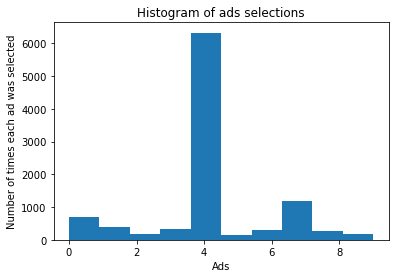

In [15]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()